In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [4]:
Au5='../dat_auriga/py/stars_main_H5_ids_127.mat'

In [5]:
au5= sio.loadmat(Au5)  #cargar datos a python
au5=au5['a']

In [6]:
# 0)X  ; 1)Y  ; 2)Z  ; 3)vx, 4)vy, 5)vz, 6)mass, 7)Ids
au5[:,0:3] = 1000.*au5[:,0:3]/0.6777 #pasar de mpc a kpc
au5[:,6] = au5[:,6]*(1.e10/0.6777) #masas solares
au5[:,7] = au5[:,7]/1.e9 #giga años
lb_time = 0 #segun el snapshot (ahora estamos a z=0)

In [7]:
#selecion de estrellas jovenes menores a 3gyr para obtener disco frio
age_sel = np.where((au5[:,7] <= 3 + lb_time)&(au5[:,7] > 0.))[0]
print len(age_sel)

346801


In [8]:
h_0 = 0.6777 
omega_lambda= 0.693
omega_m=0.307
fac_esc=1 #factor de escala (cambiar segun snapchot)
w = omega_m / (omega_lambda*(fac_esc**3))
hubble_t = h_0 * np.sqrt(omega_lambda * np.sqrt(1+w))
#distancia de objetos al centro
r_loc = np.sqrt(np.square(au5[:,0]) + np.square(au5[:,1]) + np.square(au5[:,2]))

#seleccion a menos de 10 kpc
inloc = np.where(r_loc <= 10.0)[0]

In [9]:
#obtener velocidades en unidades fisicas, dentro del radio
for j in range(3,6):
	au5[:,j] = (hubble_t * au5[:,j-3] + fac_esc * au5[:,j] - np.mean(au5[inloc,j]))

	#velocidad promedio	
	mean_v	= np.mean(au5[inloc,3:6])
	print('mean velocity: %s' %(mean_v))

	#establecer limites para centrar muestra
	zlim=6.
	Rmax=7.
	Rmin=0.

mean velocity: -0.20234505686798704
mean velocity: -1.513848188322216
mean velocity: -0.012277938346978734


In [10]:
#rotacion iterativa 4 veces 
for k in range(4):
    print k                
edad = au5[age_sel,0:6]
R = np.sqrt(np.square(edad[:,0]) + np.square(edad[:,1]))

ind=np.where( (R <= Rmax)&(R >= Rmin))[0]

atemp = edad[ind,:]

#obtener la componente para momentum
#producto cruz para obtener momentum (lx=p_y*v_z + p_z*v_y)
l1=atemp[:,1]*atemp[:,5] - atemp[:,2]*atemp[:,4]
l2=atemp[:,2]*atemp[:,3] - atemp[:,0]*atemp[:,5]
l3=atemp[:,0]*atemp[:,4] - atemp[:,1]*atemp[:,3]

lt1=np.sum(l1)
lt2=np.sum(l2)
lt3=np.sum(l3)
lt4=np.sqrt(np.square(lt1)+np.square(lt2)+np.square(lt3))

lt=[lt1,lt2,lt3,lt4]

print 'original orientation'
print 'lx/lt', lt[0]/lt[3]
print 'ly/lt', lt[1]/lt[3]
print 'lz/lt', lt[2]/lt[3]

0
1
2
3
original orientation
lx/lt 0.17858023688857158
ly/lt -0.9791796012701482
lz/lt -0.09652153878412427


In [11]:
#definir angulo de rotacion
theta= -np.rad2deg(np.arccos(lt3/lt4))
if lt[0] > 0. and lt[1] > 0:
    phi = -np.rad2deg(np.arctan(lt[0]/lt[1]))
    print 'case 1'
elif ( lt[0] > 0. ) and (lt[1] < 0.):
    phi = -(180. + np.rad2deg(np.arctan(lt[0]/lt[1])))
    print 'case 2'
elif ( lt[0] < 0. ) and (lt[1] < 0.):
    phi = -(180. + np.rad2deg(np.arctan(lt[0]/lt[1])))
    print 'case 3'
elif ( lt[0] < 0. ) and (lt[1] > 0.):
    phi = -(360. + np.rad2deg(np.arctan(lt[0]/lt[1])))
    print 'case 4'



    

case 2


[-3.37907629e-02  3.93979637e-02  7.31887266e-02 ... -1.71438985e+02
 -1.76285525e+02 -1.77450642e+02]


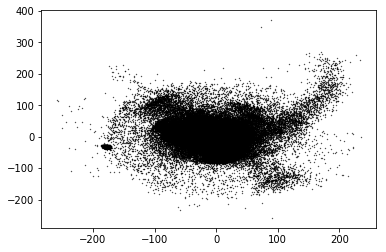

In [12]:
#antes de rotar
print au5[:,0]
len(au5[:,0])
#test 
plt.scatter(au5[:,0],au5[:,1], s=0.1,  c='k')
plt.show()

In [13]:
#a1 = np.copy(au5) primera rotacion
au5[:, 0] = au5[:,0]*np.cos(np.deg2rad(phi)) + au5[:,1]*np.sin(np.deg2rad(phi))
au5[:, 1] = -au5[:,0]*np.sin(np.deg2rad(phi)) + au5[:,1]*np.cos(np.deg2rad(phi))
au5[:, 2] = au5[:,2]
au5[:, 3] = au5[:,3]*np.cos(np.deg2rad(phi)) + au5[:,4]*np.sin(np.deg2rad(phi))
au5[:, 4] = -au5[:,3]*np.sin(np.deg2rad(phi)) + au5[:,4]*np.cos(np.deg2rad(phi))
au5[:, 5] = au5[:,5]


[ 3.12303731e-02 -5.18900224e-02 -7.40131537e-02 ...  1.74039917e+02
  1.79318850e+02  1.79634898e+02]


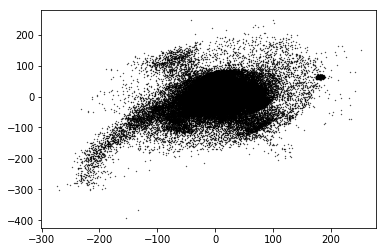

In [14]:
#muestra de primera rotacion
print au5[:,0]
len(au5[:,0])
#test 
plt.scatter(au5[:,0],au5[:,1], s=0.1,  c='k')
plt.show()

[ 3.12303731e-02 -5.18900224e-02 -7.40131537e-02 ...  1.74039917e+02
  1.79318850e+02  1.79634898e+02]


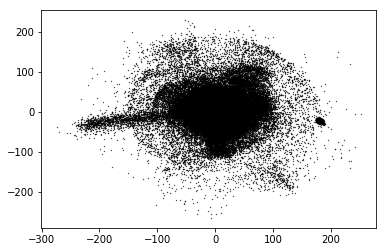

In [15]:
#segunda rotacion
au5[:,0] = au5[:,0] - 0
au5[:,1] = au5[:,2]*np.sin(np.deg2rad(theta)) + au5[:,1]*np.cos(np.deg2rad(theta))
au5[:,2] = au5[:,2]*np.cos(np.deg2rad(theta)) + au5[:,1]*np.sin(np.deg2rad(theta))
au5[:,3] = au5[:,3] - 0
au5[:,4] = au5[:,5]*np.sin(np.deg2rad(theta)) + au5[:,4]*np.cos(np.deg2rad(theta))
au5[:,5] = au5[:,5]*np.cos(np.deg2rad(theta)) + au5[:,4]*np.sin(np.deg2rad(theta))

#muestra de segunda rotacion
print au5[:,0]
len(au5[:,0])
#test 
plt.scatter(au5[:,0],au5[:,1], s=0.1,  c='k')
plt.show()

[-5.07353336e-02  6.45248456e-02  8.63032208e-02 ... -1.74624876e+02
 -1.79983578e+02 -1.79689923e+02]


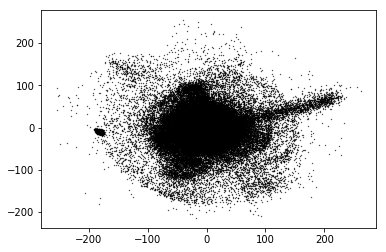

In [16]:
#tercera rotacion
phi = -phi

au5[:,0]=au5[:,0]*np.cos(np.deg2rad(phi)) + au5[:,1]*np.sin(np.deg2rad(phi))
au5[:,1]=au5[:,0]*np.sin(np.deg2rad(phi)) + au5[:,1]*np.cos(np.deg2rad(phi))
au5[:,2]=au5[:,2] - 0
au5[:,3]=au5[:,3]*np.cos(np.deg2rad(phi)) + au5[:,4]*np.sin(np.deg2rad(phi))
au5[:,4]=au5[:,3]*np.sin(np.deg2rad(phi)) + au5[:,4]*np.cos(np.deg2rad(phi))
au5[:,5]=au5[:,5] - 0

#muestra de tercera rotacion (sin menos componente Y)
print au5[:,0]
len(au5[:,0])
#test 
plt.scatter(au5[:,0],au5[:,1], s=0.1,  c='k')
plt.show()


[ 3.18582534e-02 -5.22967475e-02 -7.44087809e-02 ...  1.74058747e+02
  1.79340248e+02  1.79636670e+02]


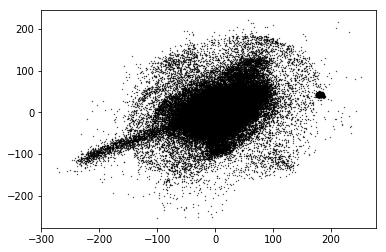

In [17]:
#tercera rotacion
phi = -phi

au5[:,0]=au5[:,0]*np.cos(np.deg2rad(phi)) + au5[:,1]*np.sin(np.deg2rad(phi))
au5[:,1]=-au5[:,0]*np.sin(np.deg2rad(phi)) + au5[:,1]*np.cos(np.deg2rad(phi))
au5[:,2]=au5[:,2] - 0
au5[:,3]=au5[:,3]*np.cos(np.deg2rad(phi)) + au5[:,4]*np.sin(np.deg2rad(phi))
au5[:,4]=-au5[:,3]*np.sin(np.deg2rad(phi)) + au5[:,4]*np.cos(np.deg2rad(phi))
au5[:,5]=au5[:,5] - 0

#muestra de tercera rotacion (CON menos componente Y)
print au5[:,0]
len(au5[:,0])
#test 
plt.scatter(au5[:,0],au5[:,1], s=0.1,  c='k')
plt.show()
